**IMPORT LIBRARY**
--

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D
from tensorflow.keras import optimizers
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
tf.executing_eagerly()

True

**DEFINE DATASET**
--

In [9]:
input_shape = (32,32)

---
rotation_range have a function to rotate the dataset, width_shift use to shift the dataset from left to right or otherwise, height_shift initiate to shift the dataset from top and bottom


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=0.1 ,width_shift_range=0.1, height_shift_range=0.1)
train_generator = train_datagen.flow_from_directory('data/train', target_size=(input_shape), batch_size=1,class_mode='categorical')
validation_generator = train_datagen.flow_from_directory( 'data/val',  target_size=(input_shape), batch_size=1,class_mode='categorical')

Found 864 images belonging to 36 classes.
Found 216 images belonging to 36 classes.


**MODEL DEFINITION**
----

You have two options, use personal model or transfer learning model. Just run only one in the part of Model Definition!, if you run both of the options, the code will run by the sequence number...

Personal Model
----

In [11]:
model = tf.keras.models.Sequential(
    [tf.keras.layers.Conv2D(filters=32, kernel_size=5, padding="same",activation='relu', name='conv1',input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=5, padding="same",activation='relu'), 
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=24, kernel_size=5, padding="same",activation='relu'), 
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(36, activation='softmax')])
model.compile(loss='categorical_crossentropy', #categorical_crosentropy is for multilabel (over than 2 classes)
                    optimizer=tf.optimizers.Adam(0.001), #learning rate (estimation/itterate)
                    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 16)        12816     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 24)          9624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 24)         0

Transfer Learning Model
----

The model of transfer learning can be found in: https://keras.io/api/applications/

You need to import first the model by following the sequence  as well as this code bellow.

We're using imagenet for the weights according the WordNet hierarchy https://www.image-net.org

In [20]:
from keras.applications.vgg16 import VGG16 #initiate for VGG16
from keras.models import Model 
#RUN FOR VGG-16
IMAGE_SIZE = [32,32] #size of images
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) 

#ADDING FOR CUSTOM LAYERS
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)
prediction = Dense(36, activation='softmax')(x) #initiation for number of maximal output dense
model = Model(inputs=vgg.input, outputs=prediction)


model.compile(loss='categorical_crossentropy', #categorical_crosentropy is for multilabel (over than 2 classes)
                    optimizer=tf.optimizers.Adam(0.001), #learning rate (estimation/itterate)
                    metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

Run the Training Model
---

You can change the values of epoch to initiate the itteration of training session

In [12]:

model_history=model.fit(train_generator,validation_data=validation_generator, epochs = 10)

Epoch 1/10
864/864 [==============================] - 7s 6ms/step - loss: 3.0921 - accuracy: 0.1597 - val_loss: 1.3173 - val_accuracy: 0.6852
Epoch 2/10
864/864 [==============================] - 3s 4ms/step - loss: 1.4192 - accuracy: 0.5648 - val_loss: 0.5241 - val_accuracy: 0.8472
Epoch 3/10
864/864 [==============================] - 4s 4ms/step - loss: 0.7727 - accuracy: 0.7454 - val_loss: 0.3241 - val_accuracy: 0.8750
Epoch 4/10
864/864 [==============================] - 4s 4ms/step - loss: 0.5168 - accuracy: 0.8264 - val_loss: 0.2472 - val_accuracy: 0.9074
Epoch 5/10
864/864 [==============================] - 4s 4ms/step - loss: 0.3680 - accuracy: 0.8704 - val_loss: 0.1623 - val_accuracy: 0.9537
Epoch 6/10
864/864 [==============================] - 3s 4ms/step - loss: 0.2990 - accuracy: 0.9016 - val_loss: 0.1010 - val_accuracy: 0.9444
Epoch 7/10
864/864 [==============================] - 3s 4ms/step - loss: 0.2376 - accuracy: 0.9236 - val_loss: 0.1038 - val_accuracy: 0.9583
Epoch 

Plot the Training Visualization
---

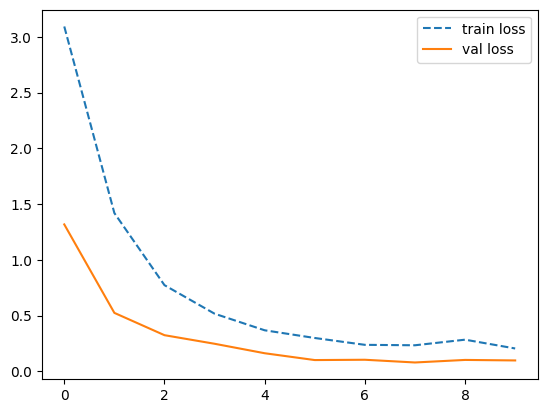

<Figure size 640x480 with 0 Axes>

In [13]:
#loss Measurement
plt.plot(model_history.history['loss'], '--',label='train loss')
plt.plot(model_history.history['val_loss'], '' ,label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



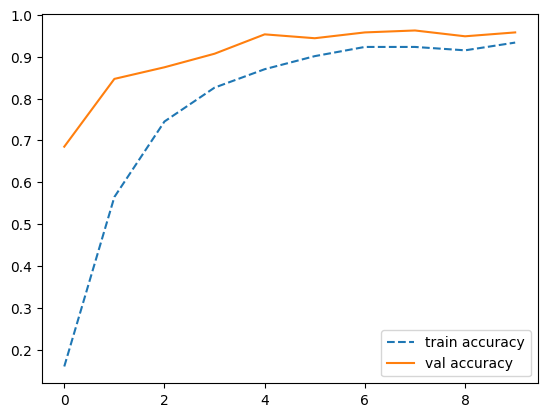

<Figure size 640x480 with 0 Axes>

In [14]:
# accuracy measurement
plt.plot(model_history.history['accuracy'], '--',label='train accuracy')
plt.plot(model_history.history['val_accuracy'], '',label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

According both of figure above, the model shown good fit with indicate high in accuracy, and shown descending in loss parameter

**Prepare for Prediction**
----

In [15]:
import numpy as np
import cv2

# Match contours to license plate or character template
def find_contours(dimensions, img) :

    # Find all contours in the image
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Retrieve potential dimensions
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]
    
    # Check largest 5 or  15 contours for license plate or character respectively
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]
    
    ii = cv2.imread('contour.jpg')#dont change the name
    
    x_cntr_list = []
    target_contours = []
    img_res = []
    for cntr in cntrs :
        #detects contour in binary image and returns the coordinates of rectangle enclosing it
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)
        
        #checking the dimensions of the contour to filter out the characters by contour's size
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
            x_cntr_list.append(intX) #stores the x coordinate of the character's contour, to used later for indexing the contours

            char_copy = np.zeros((44,24))
            #extracting each character using the enclosing rectangle's coordinates.
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))
            
            cv2.rectangle(ii, (intX,intY), (intWidth+intX, intY+intHeight), (50,21,200), 2)
            plt.imshow(ii, cmap='gray')

#             Make result formatted for classification: invert colors
            char = cv2.subtract(255, char)

            # Resize the image to 24x44 with black border
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0

            img_res.append(char_copy) #List that stores the character's binary image (unsorted)
            
    #Return characters on ascending order with respect to the x-coordinate (most-left character first)
            
    plt.show()
    #arbitrary function that stores sorted list of character indeces
    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx])# stores character images according to their index
    img_res = np.array(img_res_copy)

    return img_res

In [16]:
# Find characters in the resulting images
def segment_characters(image) :

    # Preprocess cropped license plate image
    img_lp = cv2.resize(image, (333, 75))
    img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)
    _, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_binary_lp = cv2.erode(img_binary_lp, (3,3))
    img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

    LP_WIDTH = img_binary_lp.shape[0]
    LP_HEIGHT = img_binary_lp.shape[1]

    # Make borders white
    img_binary_lp[0:3,:] = 255
    img_binary_lp[:,0:3] = 255
    img_binary_lp[72:75,:] = 255
    img_binary_lp[:,330:333] = 255

    # Estimations of character contours sizes of cropped license plates
    dimensions = [LP_WIDTH/6,
                       LP_WIDTH/2,
                       LP_HEIGHT/10,
                       2*LP_HEIGHT/3]
    plt.imshow(img_binary_lp, cmap='gray')
    plt.show()
    cv2.imwrite('contour.jpg',img_binary_lp)#dont change the name

    # Get contours within cropped license plate
    char_list = find_contours(dimensions, img_binary_lp)

    return char_list

Dont change the name if you found instruction "#dont change the name" on 2 code above


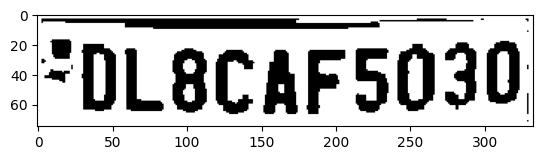

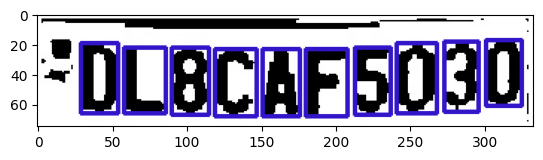

In [17]:
img = cv2.imread('car_plate.png') #you can change the name / images for Car_plate.png, please use your personal plate to recognize by this algorith
char = segment_characters(img)

In preparation section, you will be operate a threshold operation. It affected for image to change from RGB to black and white. The resources can be found on: https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-1-simple-thresholding/

**PREDICTION**
---


The images separated to n section, it depend on the number in each of plate. 

In [18]:
def fix_dimension(img): 
  new_img = np.zeros((32,32,3))
  for i in range(3):
    new_img[:,:,i] = img
  return new_img
  
def show_results():
    dic = {}
    characters = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    for i,c in enumerate(characters):
        dic[i] = c

    output = []
    for i,ch in enumerate(char): #iterating over the characters
        img_ = cv2.resize(ch, (32,32), interpolation=cv2.INTER_AREA)
        img = fix_dimension(img_)
        img = img.reshape(1,32,32,3) #preparing image for the model
       # y_ = model.predict(img)[0] #predicting the class
        y_ =np.argmax(model.predict(img), axis=1)[0] #predicting the class
        character = dic[y_] #
        output.append(character) #storing the result in a list
        
    plate_number = ''.join(output)
    
    return plate_number

print(show_results())

1/1 [==============================] - 0s 25ms/step
DL8CAF5030


1/1 [==============================] - 0s 17ms/step


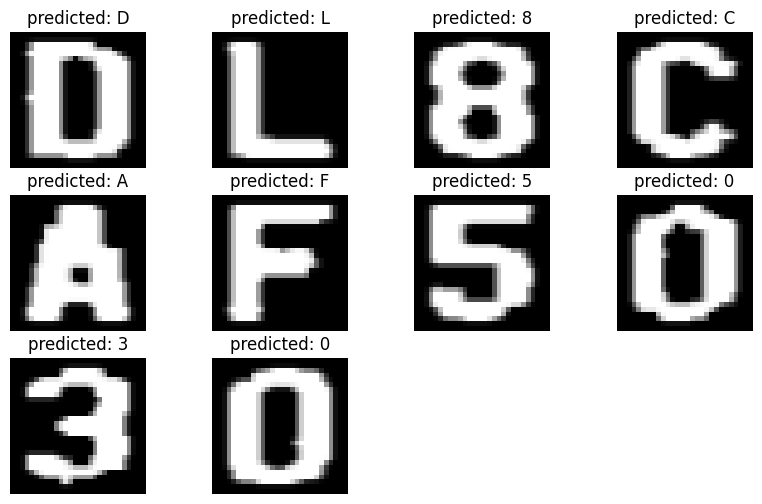

In [19]:
plt.figure(figsize=(10,6))
for i,ch in enumerate(char):
    img = cv2.resize(ch, (28,28))
    plt.subplot(3,4,i+1)
    plt.imshow(img,cmap='gray')
    plt.title(f'predicted: {show_results()[i]}')
    plt.axis('off')
plt.show()

**HEATMAP VISUALIZATION / CONFUSION MATRIX EVALUATION PERFORMANCE**
---

In [5]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
   
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [20]:
truth =     ["D","L","8","C","A","F","5","0","3","0"]
prediction =    ["D","L","8","C","A","F","5","0","3","0"]

We divided the data for truth and prediction. For example, you have 3 plate and make an assumption with the name shown on cell above. The truth indicate the actual plate for prediction, and prediction is the result

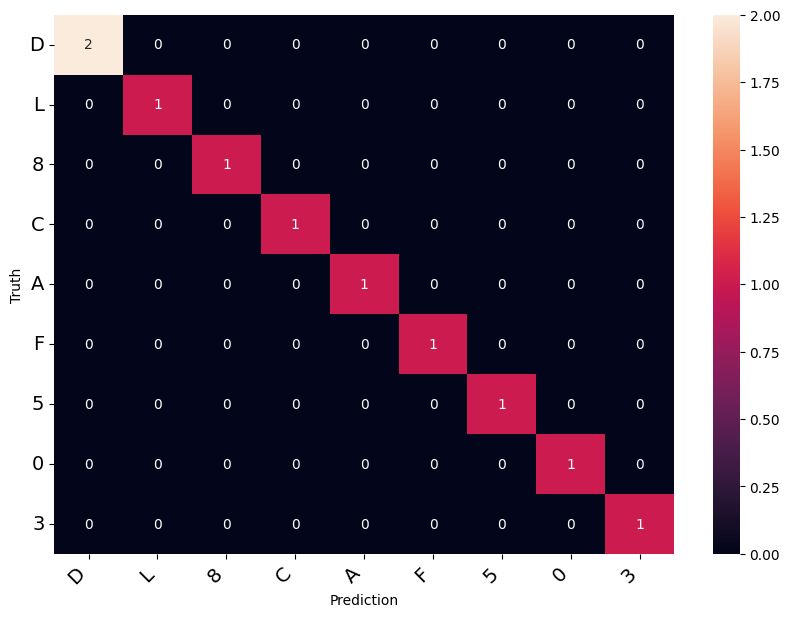

In [27]:
cm = confusion_matrix(truth,prediction)
print_confusion_matrix(cm,["D","L","8","C","A","F","5","0","3"])


In [28]:
print(classification_report(truth, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           A       1.00      1.00      1.00         1
           C       1.00      1.00      1.00         1
           D       1.00      1.00      1.00         1
           F       1.00      1.00      1.00         1
           L       1.00      1.00      1.00         1

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

